#### PREPARING PROJECT

In [35]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sys import path
from os import getcwd

In [36]:
path.append("../../../src/")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [37]:
from parsing import *
from preprocessing import *

#### PREPARING DATAFRAME

In [38]:
df = create_subj_df("../../" + raw_data_path + preproc_subj_paths[getcwd().split("\\")[-1]])

In [39]:
df.head(3)

,date,peak_hour,code_dpg
0,2012-04-02,21,PINGUSHE
1,2012-04-03,21,PINGUSHE
2,2012-04-04,21,PINGUSHE


In [40]:
df.tail(3)

,date,peak_hour,code_dpg
3052,2024-08-28,20,PINGUSHE
3053,2024-08-29,20,PINGUSHE
3054,2024-08-30,20,PINGUSHE


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3055 non-null   datetime64[ns]
 1   peak_hour  3055 non-null   object        
 2   code_dpg   3055 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 71.7+ KB


#### DATA PROCESSING

* CONVERTING TYPE

In [42]:
df["peak_hour"] = df["peak_hour"].astype("int")
df["code_dpg"] = df["code_dpg"].astype("category")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3055 non-null   datetime64[ns]
 1   peak_hour  3055 non-null   int64         
 2   code_dpg   3055 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 51.0 KB


In [44]:
df["code_dpg"] = df["code_dpg"].apply(str.upper)

In [45]:
df

,date,peak_hour,code_dpg
0,2012-04-02,21,PINGUSHE
1,2012-04-03,21,PINGUSHE
2,2012-04-04,21,PINGUSHE
3,2012-04-05,21,PINGUSHE
4,2012-04-06,21,PINGUSHE
...,...,...,...
3050,2024-08-26,20,PINGUSHE
3051,2024-08-27,20,PINGUSHE
3052,2024-08-28,20,PINGUSHE
3053,2024-08-29,20,PINGUSHE


* WORKING WITH MISSING VALUES

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3055 non-null   datetime64[ns]
 1   peak_hour  3055 non-null   int64         
 2   code_dpg   3055 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 51.0 KB


In [48]:
df.nunique()

date         3055
peak_hour      13
code_dpg        1
dtype: int64

In [49]:
uniq_codes_dpg = df["code_dpg"].unique()

* WORKING WITH EMISSIONS

________________________________________________________________________________________________________________________________________________________

In [50]:
def dpg_boxplot(x_size, y_size, dgp_code, feature_name, df):
    """"""

    plt.figure(figsize=(x_size, y_size))
    plt.title(uniq_codes_dpg[dgp_code])
    sns.boxplot(data=df[df[feature_name] == uniq_codes_dpg[dgp_code]], y="peak_hour");

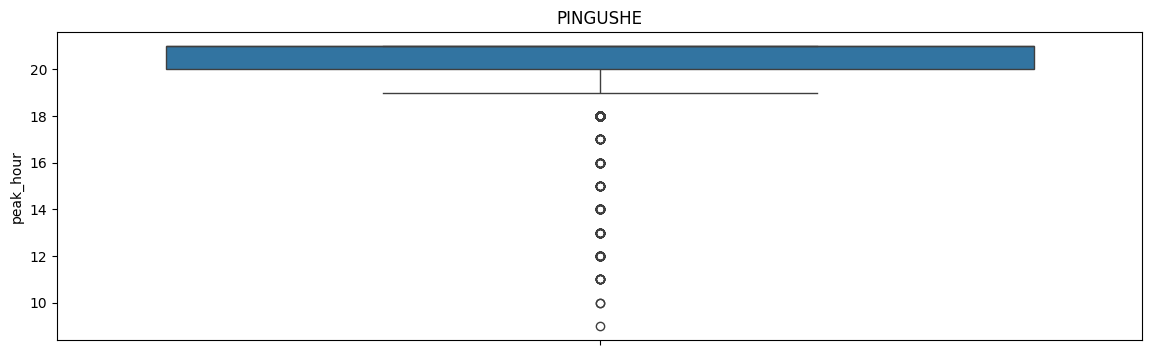

In [51]:
dpg_boxplot(14, 4, 0, "code_dpg", df)

________________________________________________________________________________________________________________________________________________________

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3055 non-null   datetime64[ns]
 1   peak_hour  3055 non-null   int64         
 2   code_dpg   3055 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 51.0 KB


* AGGREGATING DATA

In [53]:
grouped_df = df.drop(["code_dpg"], axis=1).groupby(pd.Grouper(key="date", axis=0, freq="1D", sort=True)).mean()

In [54]:
grouped_df

,peak_hour
date,
2012-04-02,21.0
2012-04-03,21.0
2012-04-04,21.0
2012-04-05,21.0
2012-04-06,21.0
...,...
2024-08-26,20.0
2024-08-27,20.0
2024-08-28,20.0


* HANDLE MISSING DATA OF AGG DATA

In [55]:
grouped_df.dropna(inplace=True)

In [56]:
grouped_df

,peak_hour
date,
2012-04-02,21.0
2012-04-03,21.0
2012-04-04,21.0
2012-04-05,21.0
2012-04-06,21.0
...,...
2024-08-26,20.0
2024-08-27,20.0
2024-08-28,20.0


In [57]:
grouped_df.sort_index(inplace=True)

In [58]:
grouped_df

,peak_hour
date,
2012-04-02,21.0
2012-04-03,21.0
2012-04-04,21.0
2012-04-05,21.0
2012-04-06,21.0
...,...
2024-08-26,20.0
2024-08-27,20.0
2024-08-28,20.0


In [59]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2012-04-02 to 2024-08-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   peak_hour  3055 non-null   float64
dtypes: float64(1)
memory usage: 47.7 KB


* HANDLE DATA TYPE OF AGG DATA

In [60]:
grouped_df["peak_hour"] = grouped_df["peak_hour"].astype("int")

In [61]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2012-04-02 to 2024-08-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   peak_hour  3055 non-null   int64
dtypes: int64(1)
memory usage: 47.7 KB


In [62]:
grouped_df.nunique()

peak_hour    13
dtype: int64

In [63]:
grouped_df.describe()

,peak_hour
count,3055.000000
mean,19.992471
std,1.624431
min,9.000000
25%,20.000000
50%,21.000000
75%,21.000000
max,21.000000


In [64]:
grouped_df

,peak_hour
date,
2012-04-02,21
2012-04-03,21
2012-04-04,21
2012-04-05,21
2012-04-06,21
...,...
2024-08-26,20
2024-08-27,20
2024-08-28,20


In [65]:
grouped_df.index.names = ["days"]

In [66]:
grouped_df

,peak_hour
days,
2012-04-02,21
2012-04-03,21
2012-04-04,21
2012-04-05,21
2012-04-06,21
...,...
2024-08-26,20
2024-08-27,20
2024-08-28,20


In [67]:
print("Time step is:", grouped_df.index[1] - grouped_df.index[0])

Time step is: 1 days 00:00:00


* SAVE DATA

In [68]:
grouped_df.to_parquet("../../../data/processed/Республика Ингушетия/data.gzip")